In [2]:
import numpy as np
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

#sample data in 3d
input = np.array([[7,4,3],[4,1,8],[6,3,5],[8,6,1],[8,5,7],[7,2,9],[5,3,3],[9,5,8],[7,4,5],[8,2,2]])

fig = pyplot.figure()
ax = Axes3D(fig)

print(input)
ax.scatter(input[:,0], input[:,1], input[:,2])

[[7 4 3]
 [4 1 8]
 [6 3 5]
 [8 6 1]
 [8 5 7]
 [7 2 9]
 [5 3 3]
 [9 5 8]
 [7 4 5]
 [8 2 2]]


In [3]:
#step 1, adjust dataset to the mean
adjusted_input = input - np.array([np.mean(input[:,0]), np.mean(input[:,1]), np.mean(input[:,2])])
print(adjusted_input)
ax.scatter(adjusted_input[:,0], adjusted_input[:,1], adjusted_input[:,2])

[[ 0.1  0.5 -2.1]
 [-2.9 -2.5  2.9]
 [-0.9 -0.5 -0.1]
 [ 1.1  2.5 -4.1]
 [ 1.1  1.5  1.9]
 [ 0.1 -1.5  3.9]
 [-1.9 -0.5 -2.1]
 [ 2.1  1.5  2.9]
 [ 0.1  0.5 -0.1]
 [ 1.1 -1.5 -3.1]]


In [4]:
#step 2: find the covariance matrix
cov = np.cov([adjusted_input[:,0], adjusted_input[:,1], adjusted_input[:,2]])
print(cov)

[[ 2.32222222  1.61111111 -0.43333333]
 [ 1.61111111  2.5        -1.27777778]
 [-0.43333333 -1.27777778  7.87777778]]


In [5]:
#step 3: find the eigen vectors
from numpy import linalg as LA
w, v = LA.eig(cov)
print("Eigen Value")
print(w)
print("Eigen Vector")
print(v)

Eigen Value
[0.74992815 3.67612927 8.27394258]
Eigen Vector
[[-0.70172743  0.69903712 -0.1375708 ]
 [ 0.70745703  0.66088917 -0.25045969]
 [ 0.08416157  0.27307986  0.95830278]]


In [6]:
#step 4: multiply the original data with the eigen vector
pc2 = np.dot(adjusted_input, np.array(v.T[1])).T
pc3 = np.dot(adjusted_input, np.array(v.T[2])).T*-1
components = np.array([pc3, pc2]).T
print(components)

[[ 2.15142276 -0.17311941]
 [-3.80418259 -2.88749898]
 [-0.15321328 -0.98688598]
 [ 4.7065185   1.30153634]
 [-1.29375788  2.27912632]
 [-4.0993133   0.1435814 ]
 [ 1.62582148 -2.23208282]
 [-2.11448986  3.2512433 ]
 [ 0.2348172   0.37304031]
 [ 2.74637697 -1.06894049]]


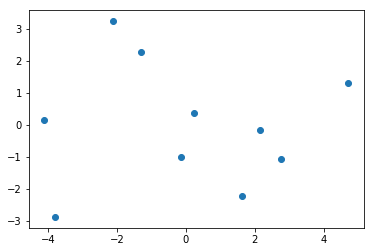

In [7]:
pyplot.scatter(components[:,0],components[:,1])

In [8]:
#PCA using sklearn library

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(input)
print(pca.transform(input)) 

[[ 2.15142276 -0.17311941]
 [-3.80418259 -2.88749898]
 [-0.15321328 -0.98688598]
 [ 4.7065185   1.30153634]
 [-1.29375788  2.27912632]
 [-4.0993133   0.1435814 ]
 [ 1.62582148 -2.23208282]
 [-2.11448986  3.2512433 ]
 [ 0.2348172   0.37304031]
 [ 2.74637697 -1.06894049]]
